This notebook is an implementation of the data structure trie in python. Tries are useful data structure when used with words that have similar prefixes. They are more space efficient than hash's but are slower as hash's should be O(1), while tries are O(N) where N is the length of the string that is being searched for.

In [1]:
from graphviz import Digraph

In [61]:
class TrieNode:
    def __init__(self, label='', children=None):
        self.children = []
        self.label = label
        
#     def __eq__(self, other):
#         if self.label == other.label:
#             return 1
#         else: return 0
    
    def add_word(self, word):
        
        if len(self.children) == 0:
            self.children += [self.make_trienode(word)]
            
        else:
            inTrie, whereToAdd, word_node = self.search_word(word)

            if not inTrie:
                whereToAdd.children += [word_node]
        
        return self
    
    def search_word(self, word):
        word_node = self.make_trienode(word)

        def search_me(self, word):
            if self.children[0].label == '*' and word.label == '*': return True, _, _
            
            for c in self.children:
                if c.label == word.label:
                    return search_me(c, word.children[0]) 
                
            return False, self, word 
        
        return search_me(self, word_node)
    
    def make_trienode(self, word):
        word_node = []
        for char in word:
            word_node += [TrieNode(char)]
            
            
        for i in range(len(word_node)-1):
            word_node[i].children += [word_node[i+1]]
        word_node[-1].children += [TrieNode('*')]
        
        return word_node[0]
    
    def visualize(tree):     
        def visualize_me(tree, dot=None):
            
            if dot is None:
                dot = Digraph()
                dot.node(name=str(tree), label = tree.label)
            
            if tree.children:
                for c in tree.children:
                    dot.node(name=str(c), label = c.label)
                    dot.edge(str(tree), str(c))
                    dot = visualize_me(c, dot)
            
            return dot
        
        dot = visualize_me(tree)
        display(dot)
        
        
        return dot

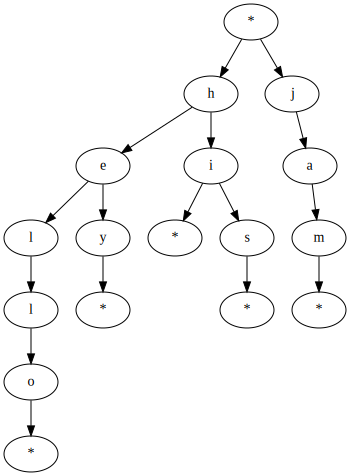

True


In [63]:
t = TrieNode('*')
t.add_word('hello')

t.add_word('jam')
t.add_word('hey')
t.add_word('hi')
t.add_word('his')
inTrie, _,_ = t.search_word('hello')
t.visualize()
print(inTrie)
